Total launches:
    total_launches
0             205


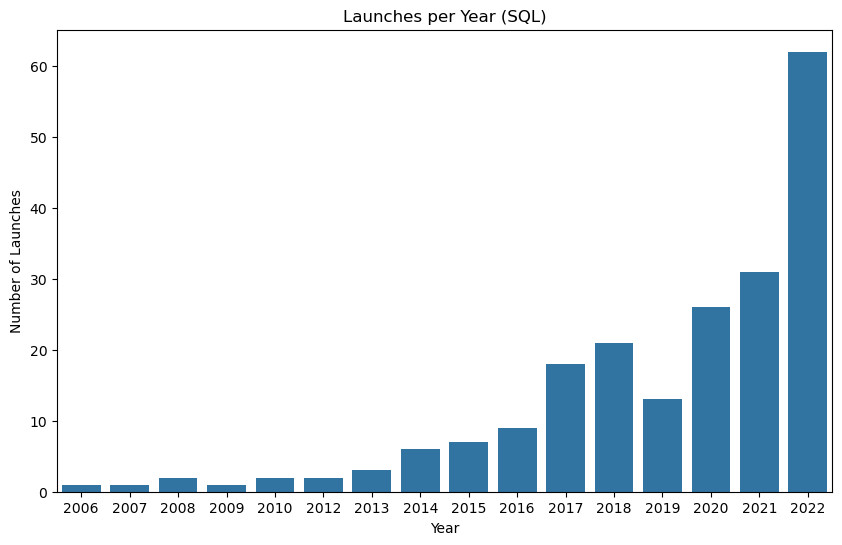

Overall success rate (%):
    success_rate
0     88.292683


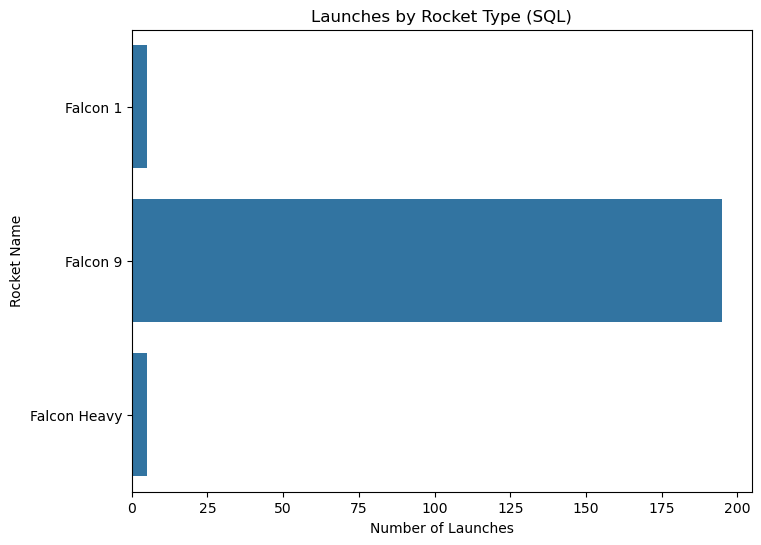

Success rate by launch site (%):
     launchpad_name  success_rate
0     CCSFS SLC 40     86.607143
1       KSC LC 39A     94.827586
2  Kwajalein Atoll     40.000000
3      VAFB SLC 4E     90.000000


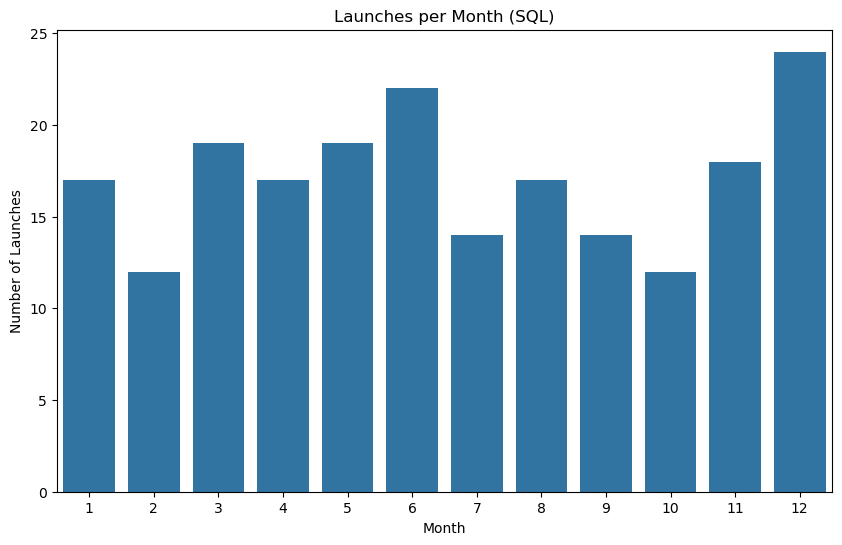

Failed launches:
                           name                  date_utc   rocket_name
0                    FalconSat  2006-03-24T22:30:00.000Z      Falcon 1
1                      DemoSat  2007-03-21T01:10:00.000Z      Falcon 1
2                  Trailblazer  2008-08-03T03:34:00.000Z      Falcon 1
3                        CRS-7  2015-06-28T14:21:00.000Z      Falcon 9
4                       Amos-6  2016-09-01T13:07:00.000Z      Falcon 9
5          Starlink 3-1 (v1.5)  2022-07-11T01:39:00.000Z      Falcon 9
6                      USSF-44  2022-11-01T13:41:00.000Z  Falcon Heavy
7         Starlink 4-36 (v1.5)  2022-10-20T14:50:00.000Z      Falcon 9
8   Galaxy 33 (15R) & 34 (12R)  2022-10-08T23:05:00.000Z      Falcon 9
9                  Hotbird 13F  2022-10-15T05:22:00.000Z      Falcon 9
10                 Hotbird 13G  2022-11-03T03:24:00.000Z      Falcon 9
11  Galaxy 31 (23R) & 32 (17R)  2022-11-08T00:00:00.000Z      Falcon 9
12                Eutelsat 10B  2022-11-15T00:00:00.000Z   

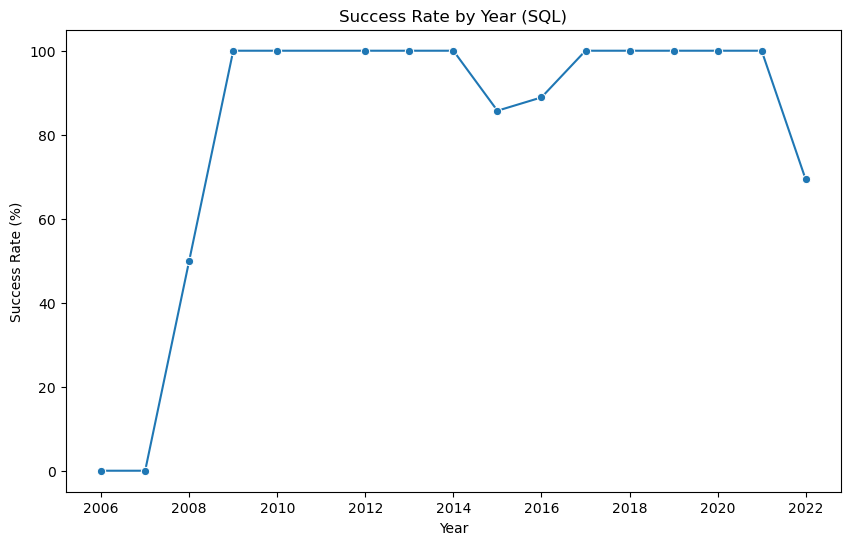

In [2]:
# sql_analysis.ipynb
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output folder exists
os.makedirs("presentation", exist_ok=True)

# Connect to database
conn = sqlite3.connect("data/spacex.db")

# Query 1: Total launches
total_launches = pd.read_sql("SELECT COUNT(*) AS total_launches FROM launches", conn)
print("Total launches:\n", total_launches)

# Query 2: Launches by year
launches_by_year = pd.read_sql("""
    SELECT year, COUNT(*) AS launch_count 
    FROM launches 
    GROUP BY year
""", conn)
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="launch_count", data=launches_by_year)
plt.title("Launches per Year (SQL)")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.savefig("presentation/sql_launches_by_year.png")
plt.show()

# Query 3: Overall success rate
success_rate = pd.read_sql("""
    SELECT AVG(success) * 100 AS success_rate 
    FROM launches
""", conn)
print("Overall success rate (%):\n", success_rate)

# Query 4: Launches by rocket
launches_by_rocket = pd.read_sql("""
    SELECT rocket_name, COUNT(*) AS launch_count 
    FROM launches 
    GROUP BY rocket_name
""", conn)
plt.figure(figsize=(8, 6))
sns.barplot(x="launch_count", y="rocket_name", data=launches_by_rocket)
plt.title("Launches by Rocket Type (SQL)")
plt.xlabel("Number of Launches")
plt.ylabel("Rocket Name")
plt.savefig("presentation/sql_launches_by_rocket.png")
plt.show()

# Query 5: Success rate by launchpad
success_by_site = pd.read_sql("""
    SELECT launchpad_name, AVG(success) * 100 AS success_rate 
    FROM launches 
    GROUP BY launchpad_name
""", conn)
print("Success rate by launch site (%):\n", success_by_site)

# Query 6: Launches by month
launches_by_month = pd.read_sql("""
    SELECT month, COUNT(*) AS launch_count 
    FROM launches 
    GROUP BY month
""", conn)
plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="launch_count", data=launches_by_month)
plt.title("Launches per Month (SQL)")
plt.xlabel("Month")
plt.ylabel("Number of Launches")
plt.savefig("presentation/sql_launches_by_month.png")
plt.show()

# Query 7: Failed launches
failed_launches = pd.read_sql("""
    SELECT name, date_utc, rocket_name 
    FROM launches 
    WHERE success = 0
""", conn)
print("Failed launches:\n", failed_launches)

# Query 8: Most recent launches
recent_launches = pd.read_sql("""
    SELECT name, date_utc, rocket_name 
    FROM launches 
    ORDER BY date_utc DESC 
    LIMIT 5
""", conn)
print("Most recent launches:\n", recent_launches)

# Query 9: Launches by site
launches_by_site = pd.read_sql("""
    SELECT launchpad_name, COUNT(*) AS launch_count 
    FROM launches 
    GROUP BY launchpad_name
""", conn)
print("Launches by site:\n", launches_by_site)

# Query 10: Yearly success rate
success_by_year = pd.read_sql("""
    SELECT year, AVG(success) * 100 AS success_rate 
    FROM launches 
    GROUP BY year
""", conn)
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="success_rate", data=success_by_year, marker="o")
plt.title("Success Rate by Year (SQL)")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.savefig("presentation/sql_success_by_year.png")
plt.show()

# Close connection
conn.close()
